In [ ]:
import hashlib
import math

class HyperLogLog:
    def __init__(self, b):
        self.b = b  # количество бит для хеширования
        self.m = 1 << b  # количество регистров
        self.data = [0] * self.m  # инициализация регистров

    def add(self, item):
        # Хешируем элемент
        x = hashlib.md5(item.encode('utf8')).hexdigest()
        x = int(x, 16)
        
        # Получаем индекс регистра
        j = x >> (x.bit_length() - self.b)
        
        # Получаем значение регистра
        w = x & ((1 << (x.bit_length() - self.b)) - 1)
        
        # Обновляем регистр
        self.data[j] = max(self.data[j], self._rho(w))

    def _rho(self, w):
        # Подсчитываем количество ведущих нулей
        return (w ^ (1 << w.bit_length() - 1)).bit_length() + 1

    def estimate(self):
        # Используем формулу для оценки количества уникальных элементов
        Z = 1.0 / sum([0.5 ** reg for reg in self.data])
        E = self.alphaMM * Z
        return E

    @property
    def alphaMM(self):
        if self.m == 16:
            return 0.673 * self.m ** 2
        elif self.m == 32:
            return 0.697 * self.m ** 2
        elif self.m == 64:
            return 0.709 * self.m ** 2
        else:
            return 0.7213 / (1 + 1.079 / self.m) * self.m ** 2


m	False Positive Rate
16	0.154625
32	0.109336
64	0.077313
128	0.054668
256	0.038656
512	0.027334
1024	0.019328


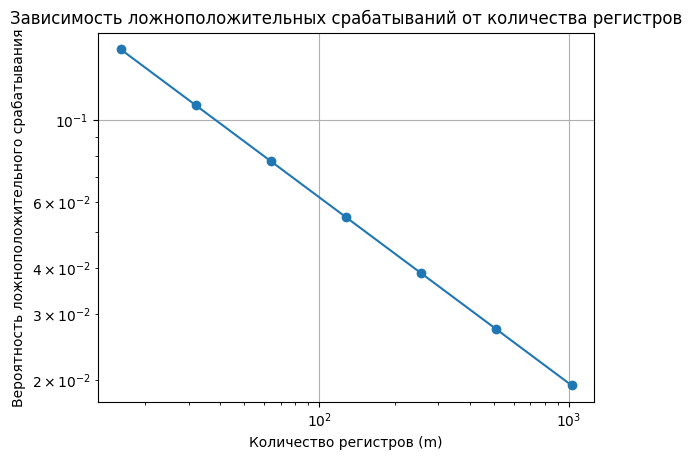

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def false_positive_rate(m):
    return 0.6185 / (m ** 0.5)

m_values = [16, 32, 64, 128, 256, 512, 1024]
false_positive_rates = [false_positive_rate(m) for m in m_values]

# Таблица
print("m\tFalse Positive Rate")
for m, rate in zip(m_values, false_positive_rates):
    print(f"{m}\t{rate:.6f}")

# График
plt.plot(m_values, false_positive_rates, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title('Зависимость ложноположительных срабатываний от количества регистров')
plt.xlabel('Количество регистров (m)')
plt.ylabel('Вероятность ложноположительного срабатывания')
plt.grid()
plt.show()


принтер

epson l3258

сброс счётчика, шайд есть на ютубе, программу установить